In [48]:
# importing of packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [49]:
# read the data file
def read_data():
    data=pd.read_csv("C:/top mentor data sci assignmets/14 may/50_Startups.csv")
    return data

In [50]:
# calling the function--
data= read_data()
print(data.head(5))

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [89]:
#renaming columns--
data=data.rename({ "R&D Spend":'R&D',"Marketing Spend":'marketing',"Administration":"administration","State":"state","Profit":"profit"},axis=1)
print(data.head(5))

         R&D  administration  marketing  state     profit
0  165349.20       136897.80  471784.10      2  192261.83
1  162597.70       151377.59  443898.53      0  191792.06
2  153441.51       101145.55  407934.54      1  191050.39
3  144372.41       118671.85  383199.62      2  182901.99
4  142107.34        91391.77  366168.42      1  166187.94


In [52]:
# checking for missing values--
data.isnull().sum()

R&D               0
administration    0
marketing         0
state             0
profit            0
dtype: int64

In [53]:
# print basic info about data--
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")

Index(['R&D', 'administration', 'marketing', 'state', 'profit'], dtype='object')
Data types---
R&D               float64
administration    float64
marketing         float64
state              object
profit            float64
dtype: object
Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&D             50 non-null     float64
 1   administration  50 non-null     float64
 2   marketing       50 non-null     float64
 3   state           50 non-null     object 
 4   profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [54]:
print("Average spend on R&D:")
print(data["R&D"].mean())
print("==========================")
print("Average spend on administration:")
print(data["administration"].mean())
print("==========================")
print("Average spend on marketing:")
print(data["marketing"].mean())
print("==========================")
print("Average profit earned:")
print(data["profit"].mean())
print("==========================")

Average spend on R&D:
73721.61559999999
Average spend on administration:
121344.63959999995
Average spend on marketing:
211025.09780000005
Average profit earned:
112012.63920000002


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
lb= LabelEncoder()
data["state"]=lb.fit_transform(data["state"])

In [57]:
print(data.head())
print(data.dtypes)

         R&D  administration  marketing  state     profit
0  165349.20       136897.80  471784.10      2  192261.83
1  162597.70       151377.59  443898.53      0  191792.06
2  153441.51       101145.55  407934.54      1  191050.39
3  144372.41       118671.85  383199.62      2  182901.99
4  142107.34        91391.77  366168.42      1  166187.94
R&D               float64
administration    float64
marketing         float64
state               int32
profit            float64
dtype: object


<AxesSubplot:>

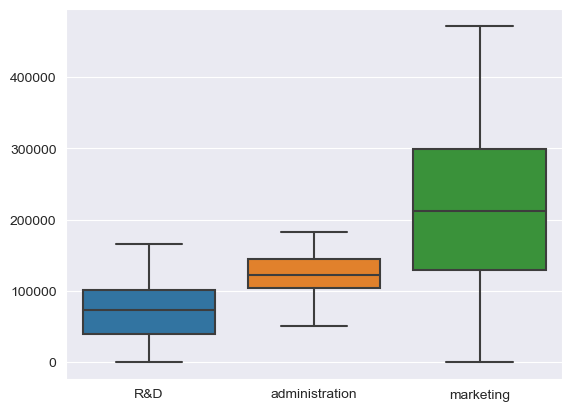

In [58]:
# EDA
# checking for outliers--
sns.boxplot(data=data.loc[:, ['R&D', 'administration','marketing']],palette="tab10")

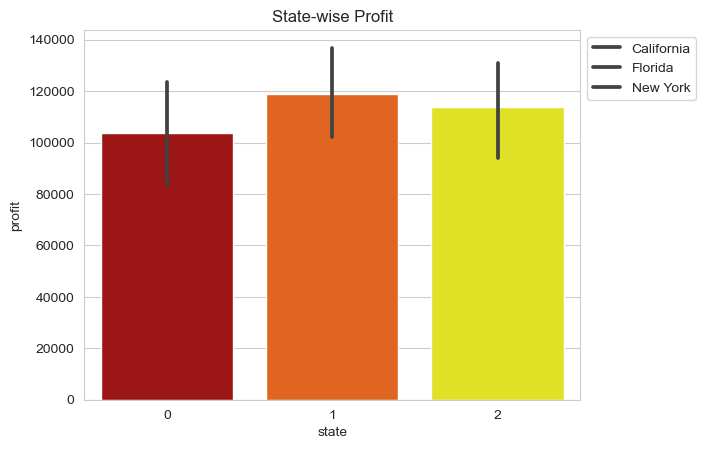

In [231]:
## statewise profit--
ax=sns.barplot(x=data["state"],y=data["profit"],data=data,palette="hot")
plt.title("State-wise Profit")
ax.legend( bbox_to_anchor=(1,1),labels=["California","Florida","New York"])

Text(0.5, 1.0, 'Statewise profit percentages')

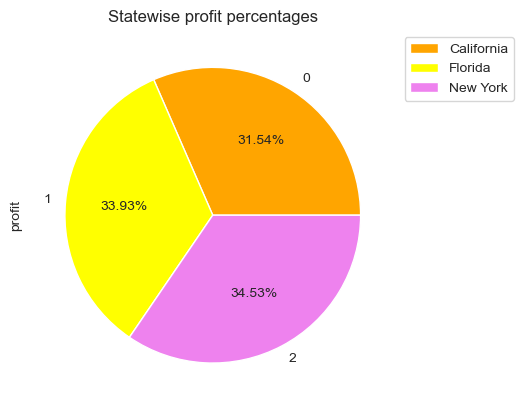

In [230]:
ax=data.groupby(["state"])["profit"].sum().plot(kind="pie",colors=['orange','yellow','violet'],autopct='%.2f%%')
ax.legend( bbox_to_anchor=(1,1),labels=["California","Florida","New York"])
plt.title("Statewise profit percentages")

Text(0.5, 1.0, 'R&D Spend VS Profit')

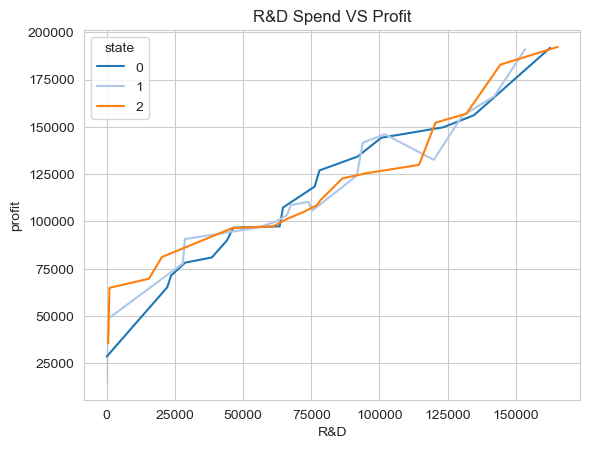

In [233]:
sns.set_style("whitegrid")
sns.lineplot(x="R&D",y="profit",data=data,hue="state",palette='tab20')
plt.title("R&D Spend VS Profit")

Text(0.5, 1.0, 'Administration Spend VS Profit')

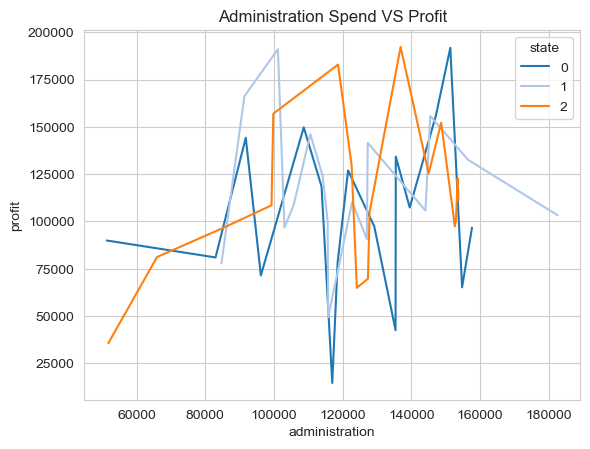

In [234]:
sns.set_style("whitegrid")
sns.lineplot(x="administration",y="profit",data=data,hue="state",palette= 'tab20')
plt.title("Administration Spend VS Profit")

Text(0.5, 1.0, 'Marketing Spend VS Profit')

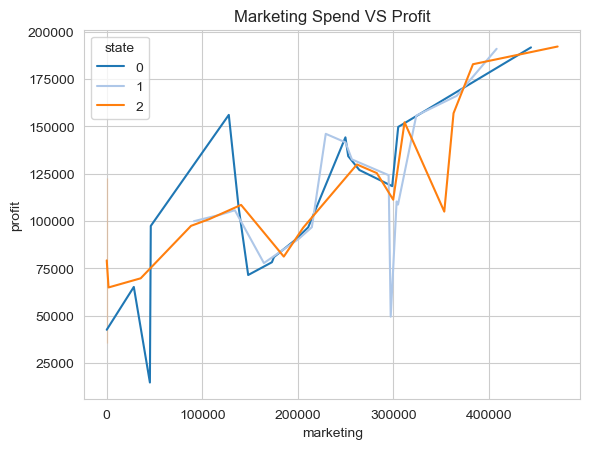

In [67]:
sns.set_style("whitegrid")
sns.lineplot(x="marketing",y="profit",data=data,hue="state",palette="tab20")
plt.title("Marketing Spend VS Profit")

<AxesSubplot:>

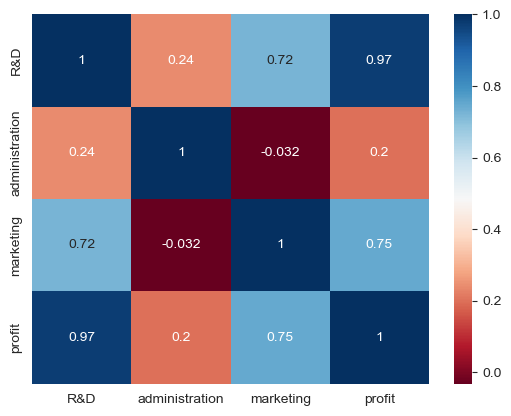

In [238]:
sns.heatmap(data[["R&D","administration","marketing","profit"]].corr(),annot=True,cmap="RdBu")

## Q prediction model for profit of 50_startups data:

In [173]:
### multiple linear regression :
df=data[["R&D","administration","marketing","profit"]]
print(df.head())

         R&D  administration  marketing     profit
0  165349.20       136897.80  471784.10  192261.83
1  162597.70       151377.59  443898.53  191792.06
2  153441.51       101145.55  407934.54  191050.39
3  144372.41       118671.85  383199.62  182901.99
4  142107.34        91391.77  366168.42  166187.94


In [174]:
df.shape

(50, 4)

In [175]:
#sampling of data
training,testing=train_test_split(df,test_size=0.2)

In [176]:
training.head()

,R&D,administration,marketing,profit
20,76253.86,113867.30,298664.47,118474.03
15,114523.61,122616.84,261776.23,129917.04
5,131876.90,99814.71,362861.36,156991.12
10,101913.08,110594.11,229160.95,146121.95
24,77044.01,99281.34,140574.81,108552.04


In [177]:
testing.head()

,R&D,administration,marketing,profit
42,23640.93,96189.63,148001.11,71498.49
31,61136.38,152701.92,88218.23,97483.56
7,130298.13,145530.06,323876.68,155752.60
23,67532.53,105751.03,304768.73,108733.99
29,65605.48,153032.06,107138.38,101004.64


In [179]:
training.shape,testing.shape

((40, 4), (10, 4))

In [188]:
#Defining
X_train=training[["R&D","administration","marketing"]]
y_train=training["profit"]

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
model=LinearRegression()
print(model)

LinearRegression()


In [191]:
train_model=model.fit(X_train,y_train)
print("Model training is completed")
print(train_model)

Model training is completed
LinearRegression()


In [192]:
print(model.coef_)
print(model.intercept_)

[ 0.80733789 -0.02881059  0.02881124]
50343.43195926117


In [3]:
RD =76253.86
administration=113867.30
marketing=298664.47
y =0.80733789*RD -0.02881059*administration+ 0.02881124*marketing + 50343.43195926117
print("Profit earned with R&D spend of {},administration spend of {} and marketing spend of {} is {} ".format(RD,administration,marketing,y))

Profit earned with R&D spend of 76253.86,administration spend of 113867.3 and marketing spend of 298664.47 is 117230.37202595237 


<AxesSubplot:xlabel='R&D', ylabel='profit'>

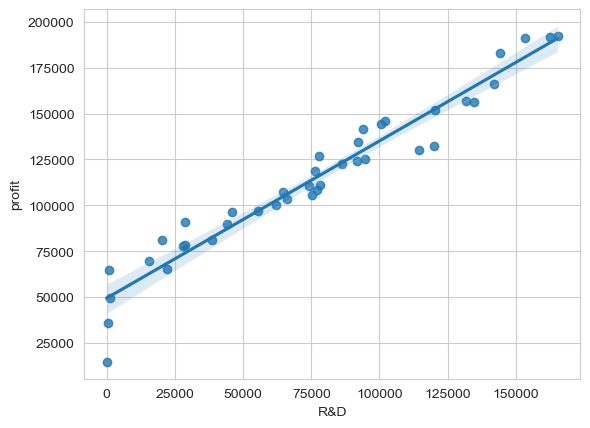

In [210]:
sns.regplot(x="R&D",y="profit",data=training)

<AxesSubplot:xlabel='administration', ylabel='profit'>

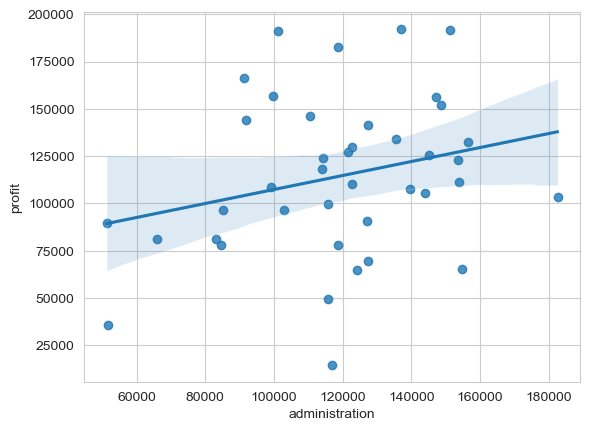

In [212]:
sns.regplot(x="administration",y="profit",data=training)

<AxesSubplot:xlabel='marketing', ylabel='profit'>

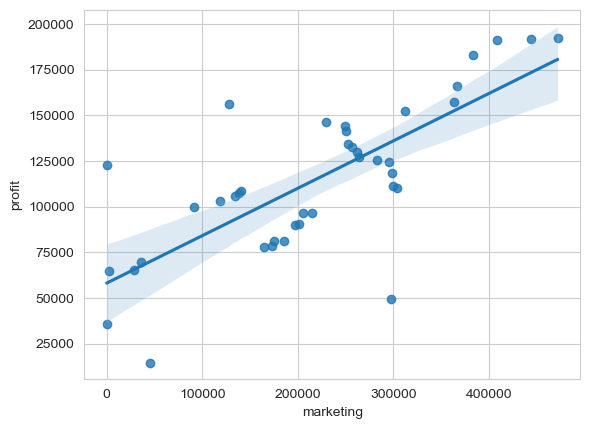

In [213]:
sns.regplot(x="marketing",y="profit",data=training)

In [214]:
X_test=testing[["R&D","administration","marketing"]]
X_test

,R&D,administration,marketing
42,23640.93,96189.63,148001.11
31,61136.38,152701.92,88218.23
7,130298.13,145530.06,323876.68
23,67532.53,105751.03,304768.73
29,65605.48,153032.06,107138.38
9,123334.88,108679.17,304981.62
27,72107.60,127864.55,353183.81
34,46426.07,157693.92,210797.67
47,0.00,135426.92,0.00
32,63408.86,129219.61,46085.25


In [218]:
pred_profit=train_model.predict(X_test)
pred_profit

array([ 70922.4668774 ,  97843.39293209, 160676.53293322, 110599.0192631 ,
       101987.06823342, 155572.14297549, 115050.44181519,  89355.04602693,
        46441.70281209,  99140.68771237])

In [219]:
testing["pred_profit"]=pred_profit
testing

,R&D,administration,marketing,profit,pred_profit
42,23640.93,96189.63,148001.11,71498.49,70922.466877
31,61136.38,152701.92,88218.23,97483.56,97843.392932
7,130298.13,145530.06,323876.68,155752.60,160676.532933
23,67532.53,105751.03,304768.73,108733.99,110599.019263
29,65605.48,153032.06,107138.38,101004.64,101987.068233
9,123334.88,108679.17,304981.62,149759.96,155572.142975
27,72107.60,127864.55,353183.81,105008.31,115050.441815
34,46426.07,157693.92,210797.67,96712.80,89355.046027
47,0.00,135426.92,0.00,42559.73,46441.702812
32,63408.86,129219.61,46085.25,97427.84,99140.687712


In [220]:
testing["Error"]=testing["profit"]-testing["pred_profit"]
testing

,R&D,administration,marketing,profit,pred_profit,Error
42,23640.93,96189.63,148001.11,71498.49,70922.466877,576.023123
31,61136.38,152701.92,88218.23,97483.56,97843.392932,-359.832932
7,130298.13,145530.06,323876.68,155752.60,160676.532933,-4923.932933
23,67532.53,105751.03,304768.73,108733.99,110599.019263,-1865.029263
29,65605.48,153032.06,107138.38,101004.64,101987.068233,-982.428233
9,123334.88,108679.17,304981.62,149759.96,155572.142975,-5812.182975
27,72107.60,127864.55,353183.81,105008.31,115050.441815,-10042.131815
34,46426.07,157693.92,210797.67,96712.80,89355.046027,7357.753973
47,0.00,135426.92,0.00,42559.73,46441.702812,-3881.972812
32,63408.86,129219.61,46085.25,97427.84,99140.687712,-1712.847712


In [223]:
round(r2_score(testing['profit'],testing['pred_profit'])*100,2)

97.58

<AxesSubplot:xlabel='R&D', ylabel='profit'>

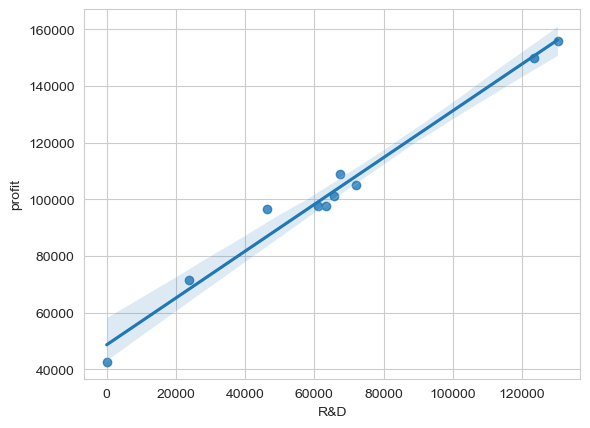

In [224]:
sns.regplot(x="R&D",y="profit",data=testing)

<AxesSubplot:xlabel='administration', ylabel='profit'>

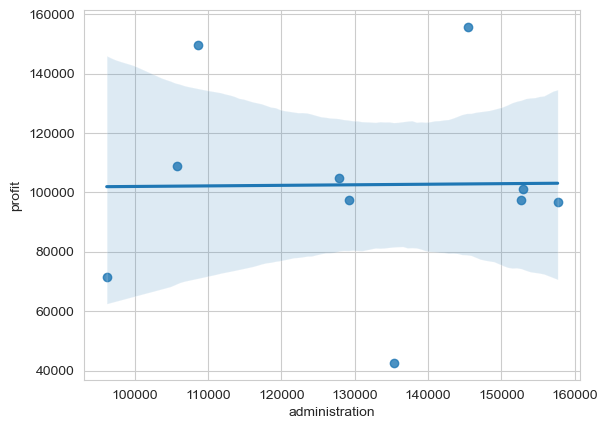

In [225]:
sns.regplot(x="administration",y="profit",data=testing)

<AxesSubplot:xlabel='marketing', ylabel='profit'>

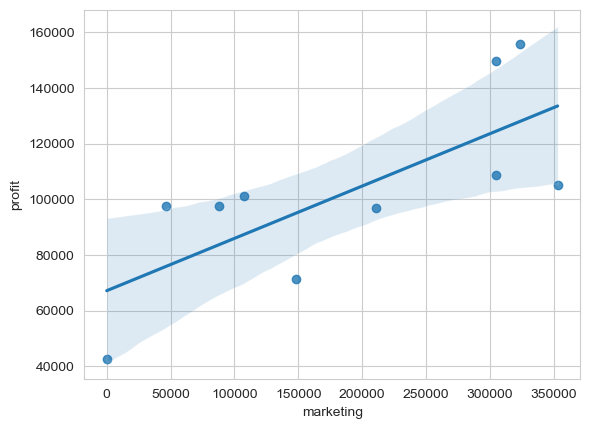

In [226]:
sns.regplot(x="marketing",y="profit",data=testing)